### Nama  : Radam Gumelar
### NIM   : 164231032
### Pratikum 14

1. Dengan data SeoulBikeData.csv, aplikasikan regresi linier untuk memprediksi berapa jumlah penyewa sepeda di kota Seoul jika temperature kota berada pada suhu berikut ini:
   1. 20 celcius
   2. 25 celcius
   3. 30 celcius
   4. 15 celcius
   5. 17 celcius

In [1]:
import pandas as pd     # modul untuk memproses dataframe
import numpy as np      # modul untuk memproses data numerik
import sklearn          # modul untuk analisis statistik
from sklearn.model_selection import train_test_split        # modul untuk membagi dataset menjadi 2 (train dan test)
from sklearn.linear_model import LinearRegression           # membuat permodelan regresi linear
import matplotlib.pyplot as plt                             # membuat plot dan visualisasinya

In [5]:
df = pd.read_csv("F:/UNAIR/ALGORITMA PEMROGRAMAN/SeoulBikeData.csv")        # membaca file format csv sesuai direktori di laptop
df.head()       # Menampilkan 5 data teratas dari tabel

,Date,Rented Bike Count,Temperature,Humidity,Wind speed,Rainfall
0,01-12-17,254,-5.2,37,2.2,0.0
1,01-12-17,204,-5.5,38,0.8,0.0
2,01-12-17,173,-6.0,39,1.0,0.0
3,01-12-17,107,-6.2,40,0.9,0.0
4,01-12-17,78,-6.0,36,2.3,0.0


In [6]:
df.describe()       # menampilkan statistika deskriptif dari data yang dibaca

,Rented Bike Count,Temperature,Humidity,Wind speed,Rainfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,0.148687
std,644.997468,11.944825,20.362413,1.036300,1.128193
min,0.000000,-17.800000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,35.000000


In [7]:
x = df["Temperature"].values        # mengambil dan menyimpan nilai dari kolom `Temperature` menjadi variabel x
y = df["Rented Bike Count"].values  # mengambil dan menyimpan nilai dari kolom `Rented Bike Count` menjadi variabel y

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

membagi dataset menjadi 2 proporsi (30% data test dan 70% data train)

**penjelasan:**<br>
- x_train   = menyimpan set data train 
- x_test    = menyimpan set data uji
- y_train   = menyimpan nilai variabel target data train
- y_test    = menyimpan nilai variabel target data uji

In [33]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
regresilinear = LinearRegression()
regresilinear.fit(x_train,y_train)

- `np.array()` = mengubah nilai pada variabel x_train dan x_test menjadi array Numpy, kemudian bentuk array-nya diubah menjadi ukuran (-1,1)
  - [-1] untuk jumlah baris
  - [1] untuk jumlah kolom
- inisiasi fungsi `LinearRegression()` ke dalam variabel regresilinear
- `.fit` untuk menyesuaikan permodelan dengan data train

In [14]:
print(f"Persamaan Regresi yang terbentuk adalah -> y = {regresilinear.intercept_} + {regresilinear.coef_[0]}x")

Persamaan Regresi yang terbentuk adalah -> y = 331.9850534734146 + 28.93610297687859x


- `regresilinear.intercept_` = perintah untuk menampilkan intercept (B0)
- `regresilinear.coef_[0]`   = perintah untuk menampilkan nilai B1

In [37]:
def hasil_y(x):
  hasil = regresilinear.intercept_ + (regresilinear.coef_*x)
  hasil2 =np.round(hasil)
  return hasil2

fungsi ini digunakan untuk memprediksi hasil nilai y berdasarkan regresi linier yang sudah dibentuk<br>
fungsi ini bernama `hasil_y` dengan parameter x untuk meyimpan nilai yang ingin diprediksi<br>
**penjelasan di dalam fungsi**:
- hasil = menghitung hasil penjumlahan dari nilai `regresilinear.intercept_` dan hasil kali nilai `regresilinear.coef_` dengan `x`
- hasil2 = pembulatan nilai hasil prediksi yang telah dihitung

In [38]:
list_suhu = [20,25,30,15,17]
for i in list_suhu:
  print(f"Jumlah penyewa sepeda ketika temperature {i} celcius di kota seoul sebanyak {hasil_y(i)}")

Jumlah penyewa sepeda ketika temperature 20 celcius di kota seoul sebanyak [911.]
Jumlah penyewa sepeda ketika temperature 25 celcius di kota seoul sebanyak [1055.]
Jumlah penyewa sepeda ketika temperature 30 celcius di kota seoul sebanyak [1200.]
Jumlah penyewa sepeda ketika temperature 15 celcius di kota seoul sebanyak [766.]
Jumlah penyewa sepeda ketika temperature 17 celcius di kota seoul sebanyak [824.]


Kesimpulan prediksi jumlah penyewa:
- 20 celcius -> 991 penyewa
- 25 celcius -> 1055 penyewa
- 30 celcius -> 1200 penyewa
- 15 celcius -> 766 penyewa
- 17 celcius -> 824 penyewa

------------------------------------------------------------------------------------------------------------------------------------------------------------

2. Menggunakan library sklearn, kita dapat mengaplikasikan multiple regression dengan
mudah. Beberapa variabel independen dapat menentukan nilai prediksi variabel dependen
jika kita memiliki data yang cukup. Dengan data SeoulBikeData-complete.csv, aplikasikan
regresi linier untuk memprediksi berapa jumlah penyewa sepeda di kota Seoul dengan
ketentuan variabel independen sebagai berikut:<br>
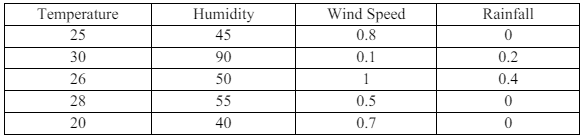

In [17]:
X = df[["Temperature", "Humidity", "Wind speed", "Rainfall" ]]      # mengambil dan menyimpan nilai dari kolom "Temperature", "Humidity", "Wind speed", "Rainfall" menjadi variabel X
Y = df["Rented Bike Count"]                                         # mengambil dan menyimpan nilai dari kolom `Rented Bike Count` menjadi variabel Y

In [18]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size = 0.3, random_state = 100)

membagi dataset menjadi 2 proporsi (30% data test dan 70% data train)

**penjelasan:**<br>
- x_train   = menyimpan set data train 
- x_test    = menyimpan set data uji
- y_train   = menyimpan nilai variabel target data train
- y_test    = menyimpan nilai variabel target data uji

In [20]:
x_train1 = np.array(x_train1).reshape(-1,4)
x_test1 = np.array(x_test1).reshape(-1,1)
regresi =LinearRegression()
regresi.fit(x_train1,y_train1)

LinearRegression()

- `np.array()` = mengubah nilai pada variabel x_train dan x_test menjadi array Numpy, kemudian bentuk array-nya diubah menjadi ukuran (-1,4)
  - [-1] untuk jumlah baris
  - [4] untuk jumlah kolom
- inisiasi fungsi `LinearRegression()` ke dalam variabel regresi
- `.fit` untuk menyesuaikan permodelan dengan data train

In [39]:
print(f"Persamaan Regresi yang terbentuk adalah -> y = {regresi.intercept_} + {regresi.coef_[0]}X1 + {regresi.coef_[1]}X2 + {regresi.coef_[2]}X3 + {regresi.coef_[3]}X4")

Persamaan Regresi yang terbentuk adalah -> y = 693.9355802016742 + 31.069726344225174X1 + -7.875218985180197X2 + 40.727838875044135X3 + -46.91386486572625X4


In [43]:
def hasil_y2(x1,x2,x3,x4):
    hasil = regresi.intercept_ + (regresi.coef_[0]*x1) + (regresi.coef_[1]*x2) + (regresi.coef_[2]*x3) + (regresi.coef_[3]*x4)
    hasil2 =np.round(hasil)
    print(f"Jumlah penyewa sepeda ketika temperature {x1} celsius, humidity {x2}, wind speed {x3}, serta rainfall {x4} adalah sebanyak {hasil2}")

fungsi ini digunakan untuk memprediksi hasil nilai y berdasarkan regresi linier yang sudah dibentuk<br>
fungsi ini bernama `hasil_y2` dengan parameter x1, x2, x3, x4 (sesuai parameter di x) untuk meyimpan nilai yang ingin diprediksi<br>
**penjelasan di dalam fungsi**:
- hasil = menghitung hasil total dari regresi.intercept_ + (regresi.coef_[0]*x1) + (regresi.coef_[1]*x2) + (regresi.coef_[2]*x3) + (regresi.coef_[3]*x4)
- hasil2 = pembulatan nilai hasil prediksi yang telah dihitung
- print menampilkan output hasil prediksi

In [44]:
data = [(25, 45, 0.8, 0), (30, 90, 0.1, 0.2), (26, 50, 1, 0.4), (28, 55, 0.5, 0), (20, 40, 0.7, 0)]
for i in data:
    hasil_y2(*i)

Jumlah penyewa sepeda ketika temperature 25 celsius, humidity 45, wind speed 0.8, serta rainfall 0 adalah sebanyak 1149.0
Jumlah penyewa sepeda ketika temperature 30 celsius, humidity 90, wind speed 0.1, serta rainfall 0.2 adalah sebanyak 912.0
Jumlah penyewa sepeda ketika temperature 26 celsius, humidity 50, wind speed 1, serta rainfall 0.4 adalah sebanyak 1130.0
Jumlah penyewa sepeda ketika temperature 28 celsius, humidity 55, wind speed 0.5, serta rainfall 0 adalah sebanyak 1151.0
Jumlah penyewa sepeda ketika temperature 20 celsius, humidity 40, wind speed 0.7, serta rainfall 0 adalah sebanyak 1029.0
